## Exemple1 de programme GNN sur tensorflow:
**qui illustre le fonctionnement d'une GNN**

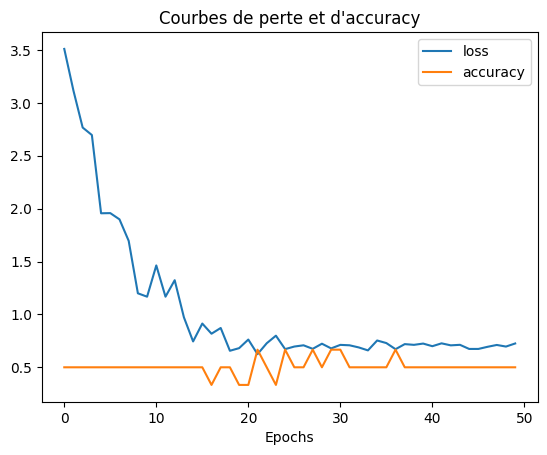

1/1 [==============================] - 0s 160ms/step
[[0.58966    0.41034   ]
 [0.5988768  0.40112326]
 [0.5786889  0.42131108]
 [0.56021726 0.4397827 ]
 [0.54033715 0.45966288]
 [0.58064884 0.4193512 ]]


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Création d'un graphe
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (2, 3), (3, 4), (4, 5)])

# Création des caractéristiques de nœuds (embedding)
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]], dtype=np.float32)

# Création des étiquettes de nœuds
y = np.array([0, 1, 0, 1, 0, 1])

# Conversion du graphe en matrice d'adjacence
A = nx.adjacency_matrix(G).toarray().astype(np.float32)

# Définition du modèle GNN
inputs = Input(shape=(X.shape[1],))
x = Dense(16, activation='relu')(inputs)
x = tf.matmul(A, x)
x = Dense(8, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

# Définition de la fonction de perte et de l'optimiseur
loss_fn = SparseCategoricalCrossentropy()
optimizer = Adam(learning_rate=0.01)

# Compilation du modèle
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X, y, epochs=50, verbose=0)

# Tracé des courbes de perte et d'accuracy
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Courbes de perte et d\'accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Prédiction pour une nouvelle entrée
new_input = X
prediction = model.predict(new_input)
print(prediction)


## exemple2 de code GNN de tensorflow:
**qui presente a la sortie le graphe utilise a l'exemple1**

1/1 [==============================] - 0s 78ms/step


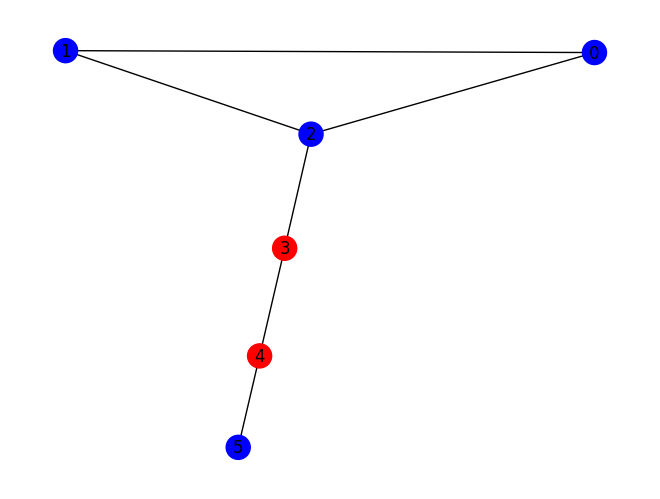

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Création d'un graphe
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (2, 3), (3, 4), (4, 5)])

# Création des caractéristiques de nœuds
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]], dtype=np.float32)

# Création des étiquettes de nœuds
y = np.array([0, 1, 0, 1, 0, 1])

# Conversion du graphe en matrice d'adjacence
A = nx.adjacency_matrix(G).toarray().astype(np.float32)

# Définition du modèle GNN
inputs = Input(shape=(X.shape[1],))
x = Dense(16, activation='relu')(inputs)
x = tf.matmul(A, x)
x = Dense(8, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

# Définition de la fonction de perte et de l'optimiseur
loss_fn = SparseCategoricalCrossentropy()
optimizer = Adam(learning_rate=0.01)

# Compilation du modèle
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X, y, epochs=50, verbose=0)

# Prédiction pour chaque nœud
predictions = model.predict(X)
predicted_classes = np.argmax(predictions, axis=1)

# Assignation des couleurs aux nœuds
node_colors = ['red' if c == 0 else 'blue' for c in predicted_classes]

# Tracé du graphe avec les couleurs des nœuds
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=node_colors, with_labels=True)
plt.show()